In [ ]:
Breast Cancer Prediction

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set()  #  Will import Seaborn functionalities

In [2]:
# Disply all Columns
pd.options.display.max_columns=70
cancerpro = pd.read_csv('C:/Users/teh_a/OneDrive/Desktop/breastcancer.csv')
cancerpro.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# To find the number of rows and columns
cancerpro.shape

(569, 33)

In [4]:
# To get an overview of teh columns
cancerpro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# check for missing values
cancerpro.isnull().sum()



id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# To understand simple statistical measures
cancerpro.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
# To drop the id and unnamed
cancerpro = cancerpro.drop('id', 1)
cancerpro=cancerpro.drop('Unnamed: 32', 1)
cancerpro

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


B    357
M    212
Name: diagnosis, dtype: int64

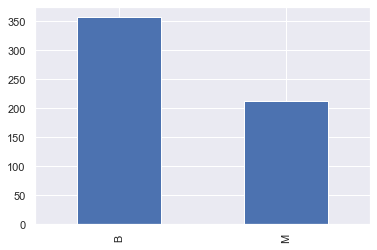

In [8]:
# To check if the data is imbalanced
plot= cancerpro['diagnosis'].value_counts().plot(kind='bar')
cancerpro['diagnosis'].value_counts()

The data is in a ratio of 63 to 37 (approx), which is not considered extremely imbalanced.

In [9]:
# converting diagnosis to binary
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
cancerpro['diagnosis']=en.fit_transform(cancerpro['diagnosis'])

In [10]:
cancerpro


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
corrmat=cancerpro.corr()
corrmat

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<AxesSubplot:>

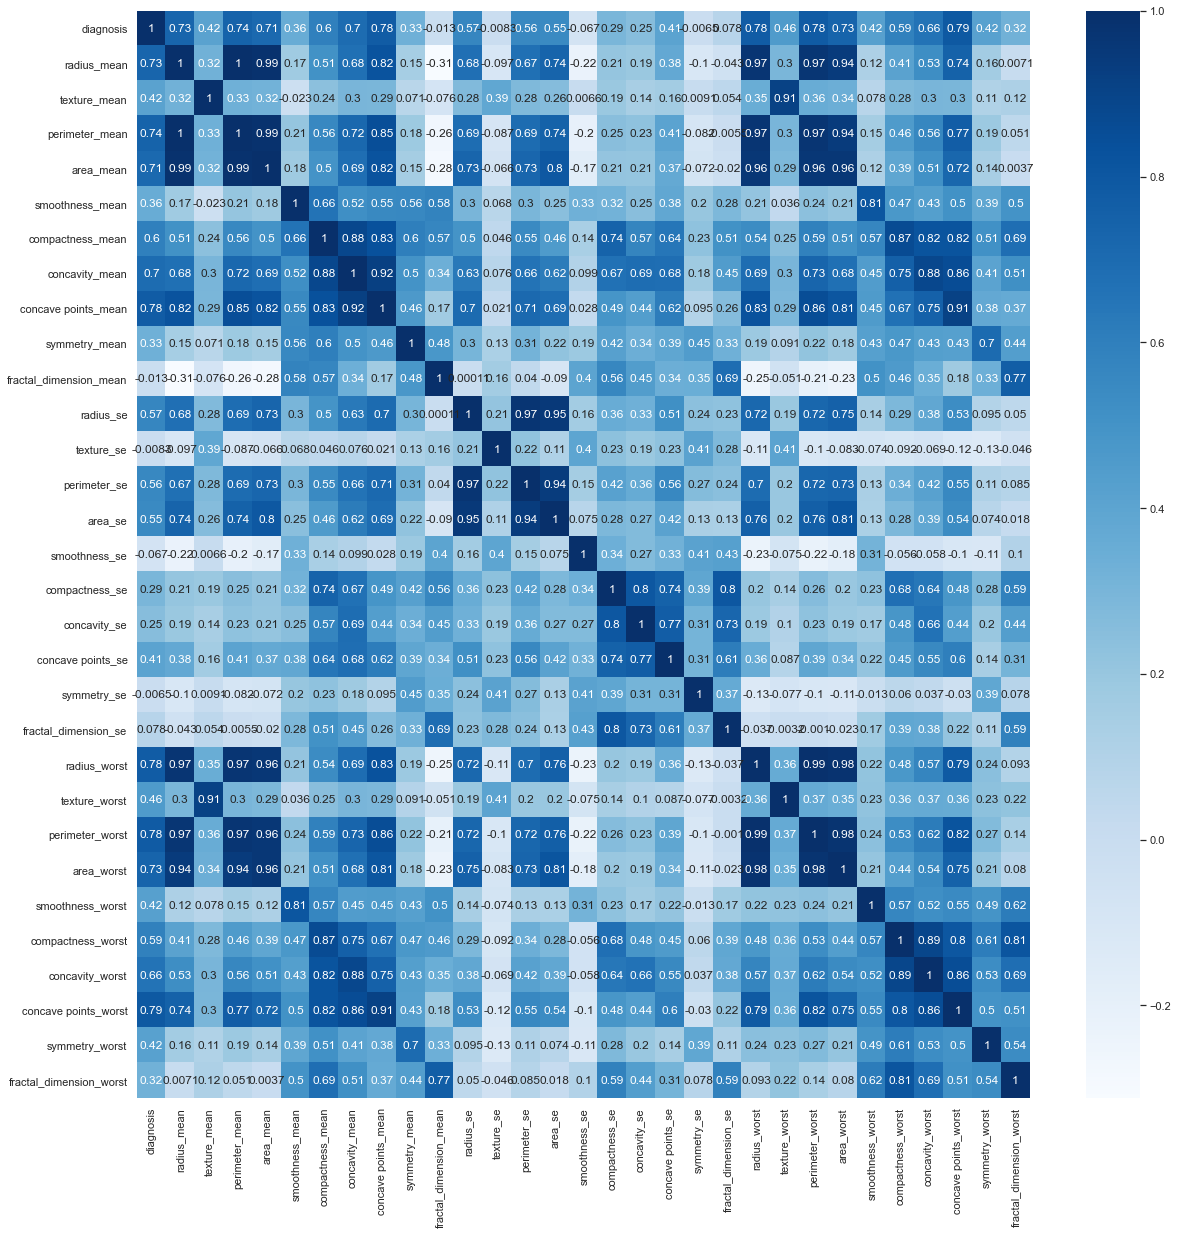

In [62]:
plt.figure(figsize=(20, 20))
sns.heatmap(cancerpro.corr(), annot=True, cmap="Blues", fmt= ".2g")

Although the correlation matrix and heat map shows that there are some highly correlated features specifially the ones which have a direct relationship with each other such as radius, perimeter and area. The best approach to eliminate the multicollineraity will be to discuss it with the Domain expert to find which variable is most important, since I lack that expertise, I decided to keep all the variables.

<AxesSubplot:>

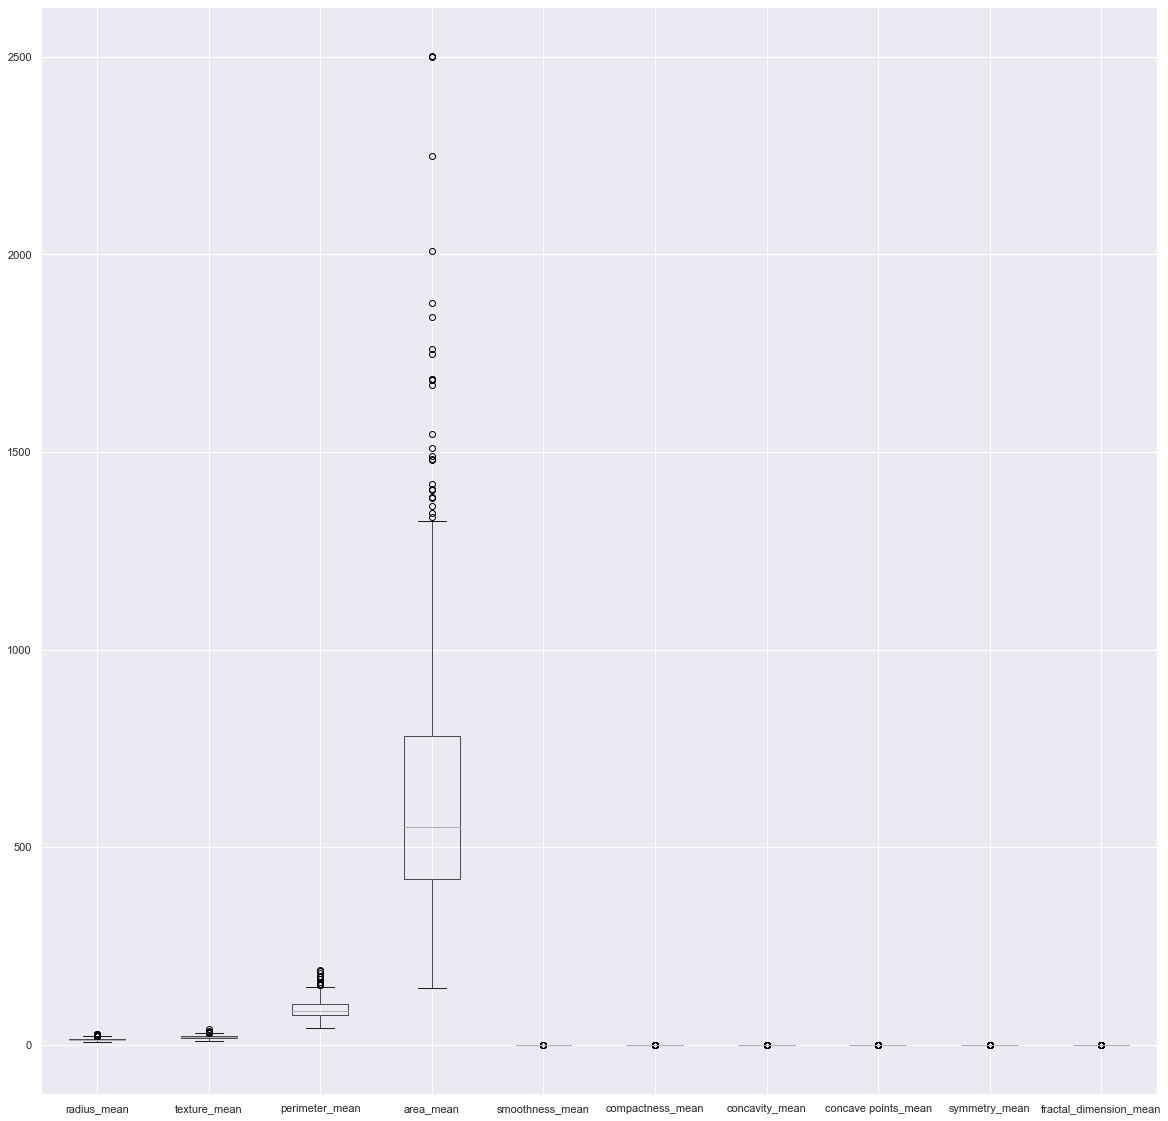

In [13]:
#To check for outliers 
plt.figure(figsize=(20, 20))
cancerpro.boxplot(['radius_mean', 'texture_mean','perimeter_mean', 'area_mean','smoothness_mean','compactness_mean','concavity_mean', 'concave points_mean','symmetry_mean', 'fractal_dimension_mean' ])

The radius_mean, texture_mean, perimeter_mean and area_mean have outliers in the data set. It could certainly be that area_mean and perimiter_mean have outliers due to the fact that radius_mean have outliers.The best approach to handle the outlier would be to touch base with Domain expert and seek guidance in how to handle outlier, should it be dropped, imputed or should a model which can handle outliers be preferred over losing the information.

<AxesSubplot:>

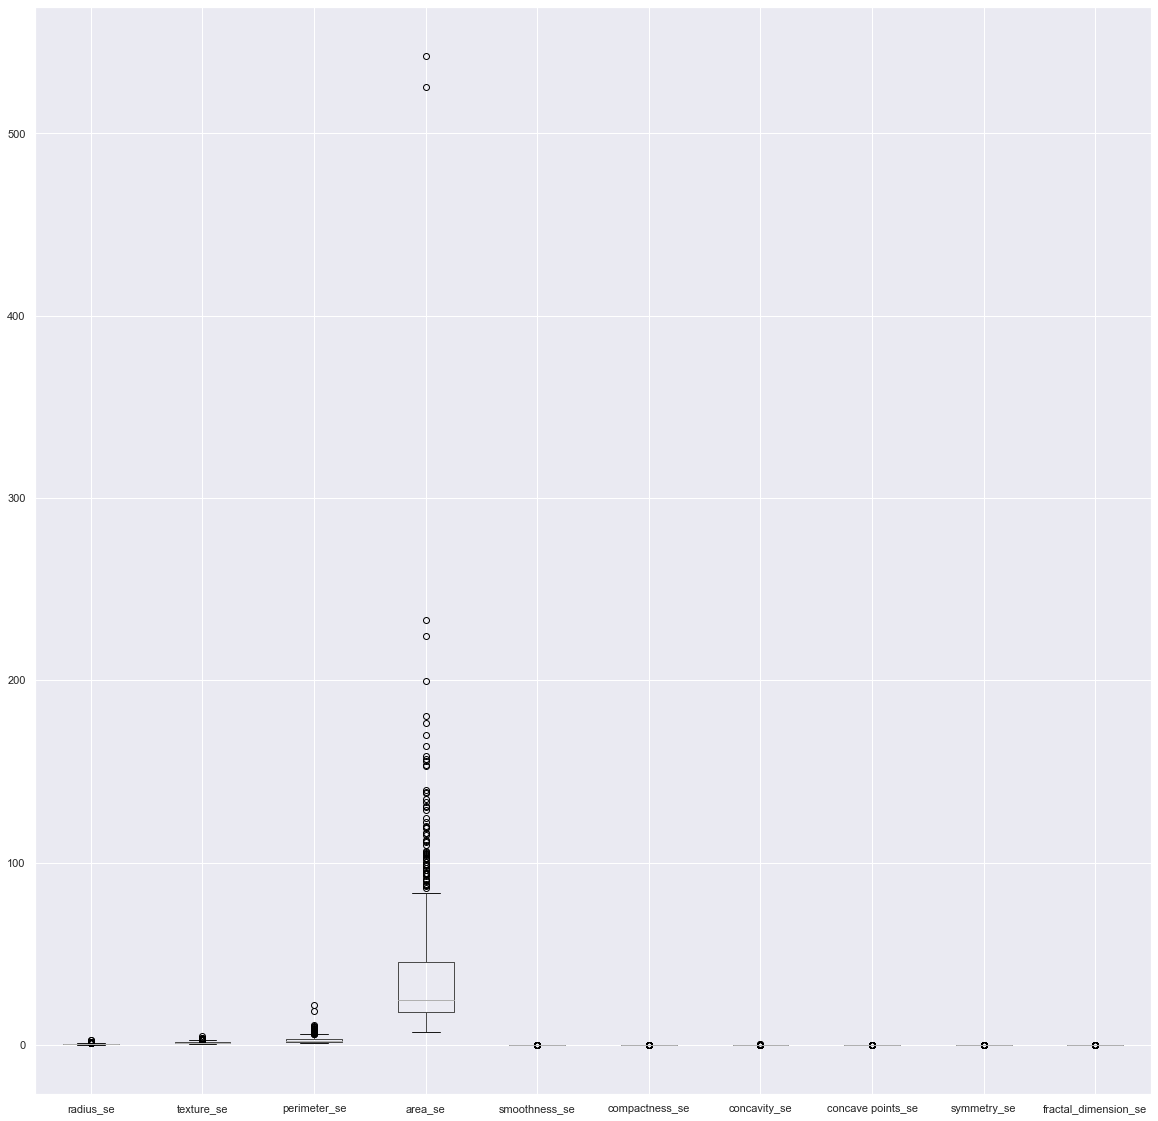

In [14]:
#To check for outliers
plt.figure(figsize=(20, 20))
cancerpro.boxplot(['radius_se', 'texture_se','perimeter_se', 'area_se','smoothness_se','compactness_se','concavity_se', 'concave points_se','symmetry_se', 'fractal_dimension_se' ])

The radius_se, texture_se, perimeter_se and area_se have outliers in the data set. It could certainly be that area_se and perimiter_se have outliers due to the fact that radius_se have outliers.The best approach to handle the outlier would be to touch base with Domain expert and seek guidance in how to handle outlier, should it be dropped, imputed or should a model which can handle outliers be preferred over losing the information.

<AxesSubplot:>

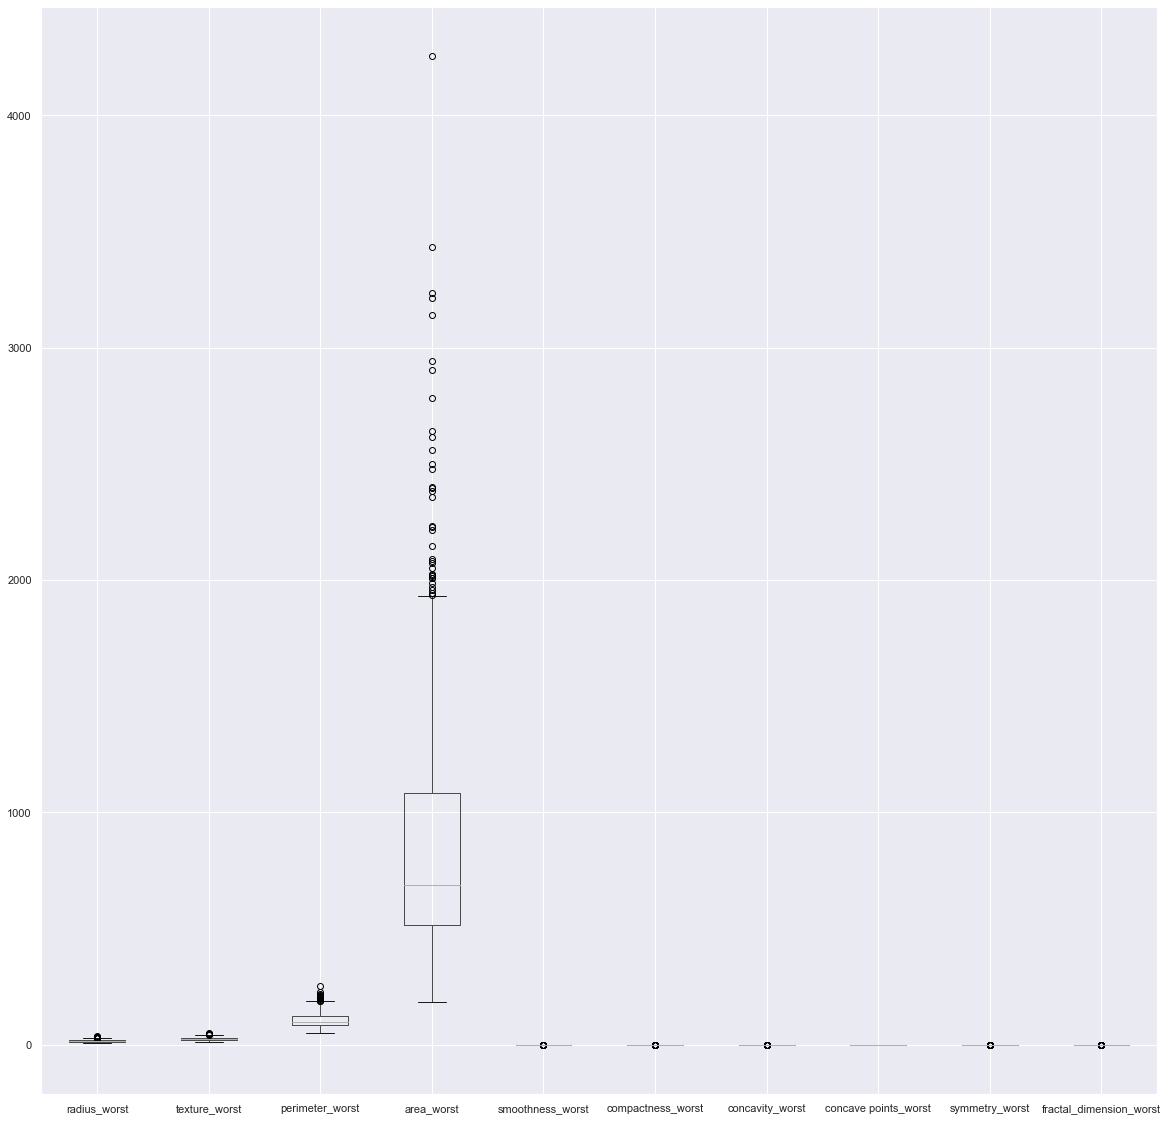

In [15]:
#To check for outliers
plt.figure(figsize=(20, 20))
cancerpro.boxplot(['radius_worst', 'texture_worst','perimeter_worst', 'area_worst','smoothness_worst','compactness_worst', 'concavity_worst', 'concave points_worst','symmetry_worst', 'fractal_dimension_worst' ])


The radius_worst, texture_worst, perimeter_worst and area_worst have outliers in the data set. It could certainly be that area_worst and perimiter_worst have outliers due to the fact that radius_worst have outliers.The best approach to handle the outlier would be to touch base with Domain expert and seek guidance in how to handle outlier, should it be dropped, imputed or should a model which can handle outliers be preferred over losing the information.

In [16]:
# Splitting the dataset into the Training set and Test set
X = cancerpro.drop('diagnosis', axis = 1)
y = cancerpro.diagnosis

from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(X,y,
                                               test_size = .2,
                                               random_state= 45)


In [17]:
test_features.shape


(114, 30)

In [18]:
training_target.shape

(455,)

In [19]:
# To create a baseline model

from sklearn.dummy import DummyClassifier

dummy_baseline = DummyClassifier(strategy="uniform")

dummy_baseline.fit(test_features, test_target)


DummyClassifier(strategy='uniform')

In [20]:
score = dummy_baseline.score(test_features, test_target)
print('The fraction of correct classifications is: {:5.3f}'.format(score))

The fraction of correct classifications is: 0.482


Decision Tree Model

In [21]:
`from sklearn.tree import DecisionTreeClassifier
DecisionTreeModel = DecisionTreeClassifier(criterion='entropy', random_state=45  , max_depth=4)

In [22]:
%%time
DecisionTreeModel.fit(training_features, training_target)  # Training input and its Target variables


Wall time: 8.97 ms


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=45)

In [23]:
%%time
DTPred = DecisionTreeModel.predict(test_features) #prediction on test


Wall time: 2 ms


In [24]:
DTPred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1])

In [25]:
test_target

440    0
262    1
260    1
145    0
504    0
      ..
415    0
246    0
493    0
329    1
4      1
Name: diagnosis, Length: 114, dtype: int32

In [26]:
# Confusion Matrix 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
# Confusion Matrix for Decision Tree
CMTD = confusion_matrix(test_target,DTPred) # Compare the predicted target varaible to the orginal target variable
CMTD

array([[72,  0],
       [ 7, 35]], dtype=int64)

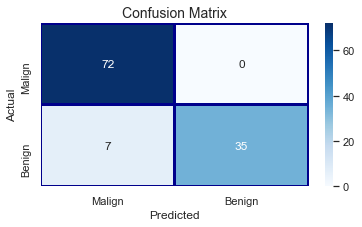

In [28]:
target = 'diagnosis'
CMTD = pd.crosstab(test_target,DTPred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(6,3))
sns.heatmap(CMTD, 
            xticklabels=['Malign', 'Benign'],
            yticklabels=['Malign', 'Benign'],
            annot=True,ax=ax1,
            linewidths=2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

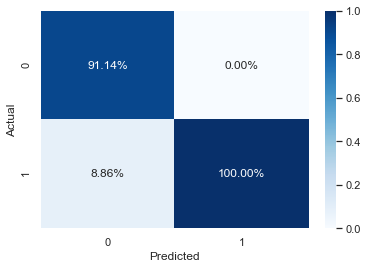

In [29]:
DTCM=sns.heatmap(CMTD/np.sum(CMTD), annot=True, 
            fmt='.2%', cmap='Blues')

In [30]:
# Accuracy Score for Decision Tree
ADT= accuracy_score(test_target, DTPred)

print(" Decision Tree Prediction Accuracy : {:.2f}%".format(ADT * 100))
# print()

 Decision Tree Prediction Accuracy : 93.86%


Logistic Regression Model

In [31]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression(max_iter=100,random_state=0, solver='liblinear')
# Fit the model
LR.fit(training_features, training_target)


LogisticRegression(random_state=0, solver='liblinear')

In [34]:
%%time

# Predicting the Test set results

LRPred =LR.predict(test_features)


Wall time: 0 ns


In [35]:
# Confusion Matrix for Logistic Regression
CMLR= confusion_matrix(test_target, LRPred)
CMLR

array([[71,  1],
       [ 4, 38]], dtype=int64)

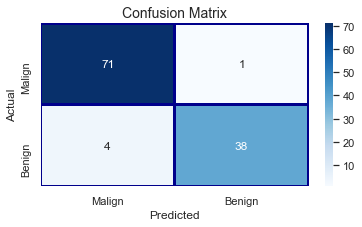

In [36]:
target = 'diagnosis'
CMLR = pd.crosstab(test_target,LRPred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(6,3))
sns.heatmap(CMLR, 
            xticklabels=['Malign', 'Benign'],
            yticklabels=['Malign', 'Benign'],
            annot=True,ax=ax1,
            linewidths=2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()


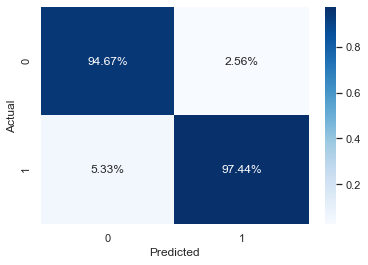

In [37]:
LRCM=sns.heatmap(CMLR/np.sum(CMLR), annot=True, 
            fmt='.2%', cmap='Blues')

In [38]:
# Accuracy Score of Logistic Regression
ACLR= accuracy_score(test_target, LRPred )

print(" LGR Prediction Accuracy : {:.2f}%".format(ACLR * 100))


 LGR Prediction Accuracy : 95.61%


Random Forest

In [39]:
# Fitting Decision Tree Classification to the Training set
from sklearn.ensemble import RandomForestClassifier

RFModel = RandomForestClassifier( n_estimators = 109, max_features= 7, oob_score= True, random_state= 42)

RFModel.fit(training_features, training_target)


RandomForestClassifier(max_features=7, n_estimators=109, oob_score=True,
                       random_state=42)

In [40]:
# Predicting the Test set results
RFPred = RFModel.predict(test_features)

In [41]:
# Confusion Matrix for Random Forest
CMRF= confusion_matrix(test_target, RFPred)
CMRF

array([[72,  0],
       [ 3, 39]], dtype=int64)

In [63]:
# Accuracy Score for Random Forest
ACRF= accuracy_score(test_target, RFPred )
print(" Random Forest Prediction Accuracy : {:.2f}%".format(ACRF * 100))

 Random Forest Prediction Accuracy : 97.37%


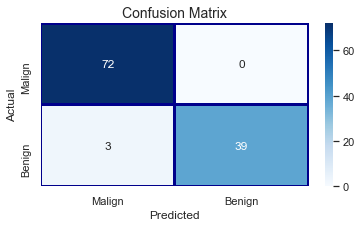

In [55]:
target = 'diagnosis'
CMRF = pd.crosstab(test_target,RFPred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(6,3))
sns.heatmap(CMRF, 
            xticklabels=['Malign', 'Benign'],
            yticklabels=['Malign', 'Benign'],
            annot=True,ax=ax1,
            linewidths=2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()


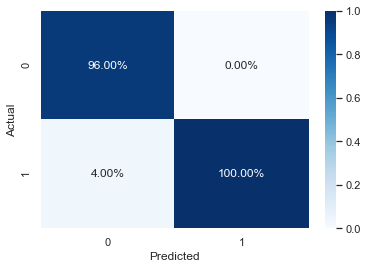

In [56]:
RFCM=sns.heatmap(CMRF/np.sum(CMRF), annot=True, 
            fmt='.2%', cmap='Blues')

Model Assessment

In [57]:
print(" Decision Tree Prediction Accuracy           : {:.2f}%".format(ADT  * 100))
print(" Random Forest Prediction Accuracy           : {:.2f}%".format(ACRF * 100))
print(" Logistic Regression Prediction Accuracy     : {:.2f}%".format(ACLR * 100))

 Decision Tree Prediction Accuracy           : 93.86%
 Random Forest Prediction Accuracy           : 97.37%
 Logistic Regression Prediction Accuracy     : 95.61%


In [58]:
DTPred     = DecisionTreeModel.predict(test_features)
LRPred     = LR.predict(test_features)
RFPred     = RFModel.predict(test_features)
AST_DT   = classification_report(test_target, DTPred)
AST_LR   = classification_report(test_target, LRPred)
AST_RF   = classification_report(test_target, RFPred)

In [59]:
print("Decision Tree Classification Report \n\n " , AST_DT)

Decision Tree Classification Report 

                precision    recall  f1-score   support

           0       0.91      1.00      0.95        72
           1       1.00      0.83      0.91        42

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [60]:
print("Logistic Regression Classification Report \n\n " , AST_LR)

Logistic Regression Classification Report 

                precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [61]:
print("Random Forest Classification Report \n\n " , AST_RF)

Random Forest Classification Report 

                precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



The best model is Random Forest not only it has higher accuracy but also the f1 score and recall for random forest is best as compared to the other models, and since in the given situation we need a model to predict malign the type 2 error should be at minimum hence recall rate should be considered to decide the model.